#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Файл с ЭКГ сигналом (ecg.csv) в папке

In [6]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [159]:
class Experiment:
    
    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.date = data['date']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        data = pd.read_csv(self.path_signal)
        signal = data['MLII']
        return signal
    
    def det_date(self):
        return self.date
    
    def get_signal_length(self):
        return len(self.signal)
    
    def plot_signal(self):
        plt.figure(figsize=(12, 8))
        signal_to_plot = self.signal 
        plt.plot(signal_to_plot)
        plt.show()
    
    def _signal_filtration(self, signal, filtration_perams):
        filtered_signal = hp.filter_signal(signal, **filtration_perams)
        return filtered_signal
    
    def _signal_find_peaks(self, signal, find_peaks_parametres):
        peaks, _ = find_peaks(filtered, **find_peaks_parametres)
        return peaks
    
    def _calculate_RR_intervals(self):
        filtration_params = self.parameters['filtration']
        find_peaks_params = self.parameters['find_peaks']
        filtered_signal = self._signal_filtration(self.signal, filtration_params)
        peaks = self._signal_find_peaks(filtered_signal, find_peaks_params)
        rr_intervals = np.diff(peaks) / filtration_params['sample_rate']
        return rr_intervals
    
    def get_RR_statistics(self):
        rr_intervals = self._calculate_RR_intervals()
        
        rr_stats = {
            'mean': np.mean(rr_intervals),
            'std': np.std(rr_intervals),
            'min': np.min(rr_intervals),
            'max': np.max(rr_intervals)
        }
        self.plot_signal()
        return rr_stats

In [160]:
data = {
    'date': '2023-01-05',
    'signal': 'ecg.csv',
    'parameters': {
        'filtration': {
            'cutoff': [0.75, 3.5],
            'sample_rate': 100,
            'order': 3,
            'filtertype': 'bandpass'
        },
        'find_peaks': {
            'height': 20 
        }
    }
}

In [161]:
ecg = Experiment(data)

In [162]:
signal = ecg.load_signal()

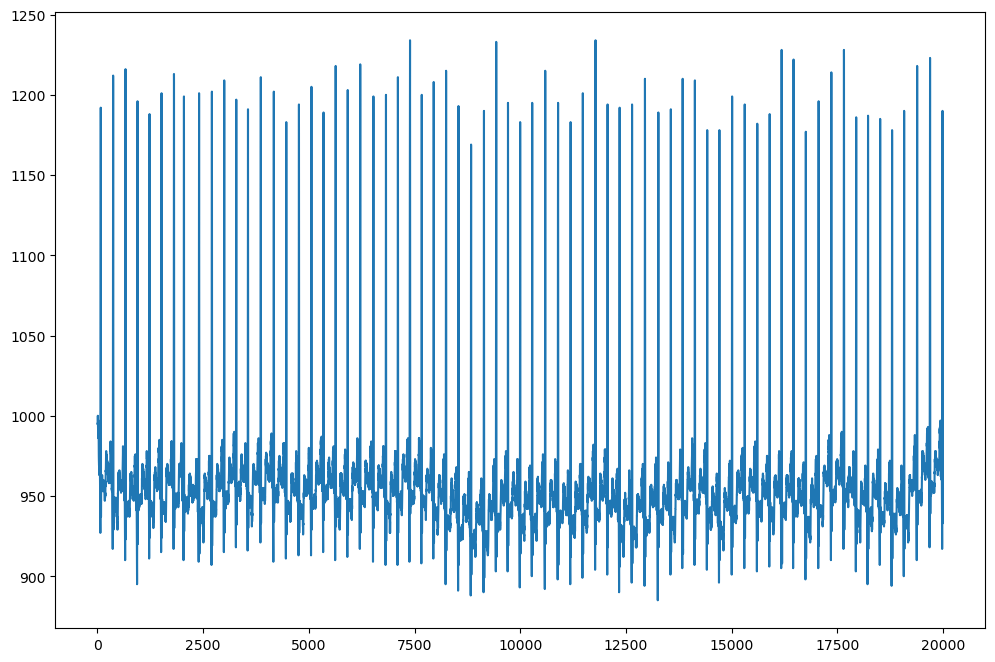

{'mean': 2.8862318840579713, 'std': 0.3107732359789018, 'min': 0.66, 'max': 3.58}


In [163]:
rr_statistics = ecg.get_RR_statistics()
print(rr_statistics)

##Задача ** "Минигольф"

 в папке на githab